In [2]:
%pip install tensorflow_hub

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------ --------------------- 0.8/1.7 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 4.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


%pip install tensorflow_hub

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import PIL.Image as Image
import os
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import tensorflow as tf
import tensorflow_hub as hub

print("TensorFlow version:", tf.__version__)
print("TensorFlow Hub version:", hub.__version__)


TensorFlow version: 2.18.0
TensorFlow Hub version: 0.16.1


In [6]:
%pip install --upgrade tensorflow tensorflow-hub


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
inception_v3 = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"

classifier_model = mobilenet_v2

In [7]:
import tensorflow as tf
import tensorflow_hub as hub

print("TensorFlow version:", tf.__version__)
print("TensorFlow Hub version:", hub.__version__)


TensorFlow version: 2.18.0
TensorFlow Hub version: 0.16.1


In [9]:
%pip install tf_keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import tf_keras

mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
classifier_model = mobilenet_v2
IMAGE_SHAPE = (224, 224)

classifier = tf_keras.Sequential([
    hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,))
])

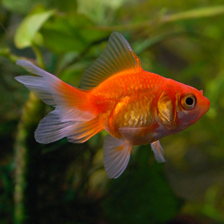

In [14]:
goldfish=Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
goldfish

In [15]:
goldfish=np.array(goldfish)/255.0
goldfish.shape

(224, 224, 3)

In [16]:
goldfish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [17]:
goldfish[np.newaxis, ...].shape
# Add a batch dimension, and pass the image to the model.
# The first prediction is the result for the image.
# The result shows the predicted class and the confidence score.

(1, 224, 224, 3)

In [19]:
result=classifier.predict(goldfish[np.newaxis, ...])
result.shape

1/1 [==============================] - 0s 481ms/step


(1, 1001)

In [20]:
predicted_label_index=np.argmax(result)
predicted_label_index

2

In [21]:
image_labels=[]
with open("ImageNetLabels.txt","r") as f:
    image_labels=f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [22]:
print(image_labels[predicted_label_index])

goldfish


In [23]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 74s 0us/step


In [24]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [25]:
image_files = list(data_dir.glob('*/**/*.jpg'))
image_files

[WindowsPath('datasets/flower_photos/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos

In [26]:
len(image_files)

3670

In [27]:
flowers_images_dict = {
    'roses': list(data_dir.glob('*/roses/*')),
    'daisy': list(data_dir.glob('*/daisy/*')),
    'dandelion': list(data_dir.glob('*/dandelion/*')),
    'sunflowers': list(data_dir.glob('*/sunflowers/*')),
    'tulips': list(data_dir.glob('*/tulips/*')),
}

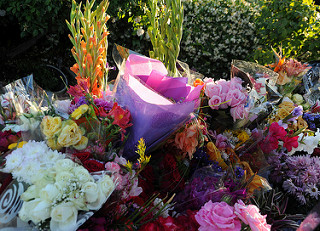

In [32]:
Image.open(str(flowers_images_dict['roses'][3]))

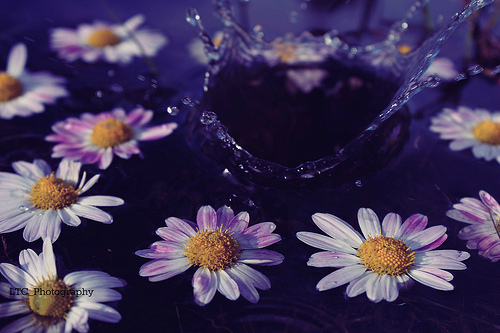

In [33]:
Image.open(str(flowers_images_dict['daisy'][3]))

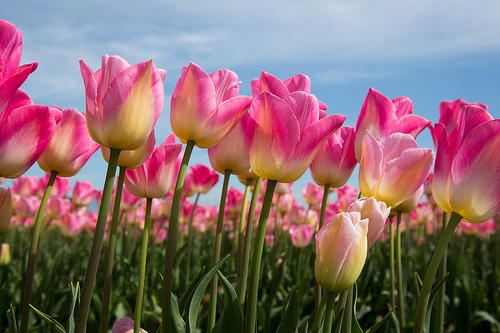

In [34]:
Image.open(str(flowers_images_dict['tulips'][3]))

In [35]:
flowers_labels_dict = {
    "roses":0,
    "daisy":1,
    "dandelion":2,
    "sunflowers":3,
    "tulips":4
}

In [36]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [38]:
IMAGE_SHAPE = (224, 224)

In [39]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [40]:
X,y=[],[]

for flower_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])


In [41]:
X=np.array(X)
y=np.array(y)

In [42]:
predictions=classifier.predict(np.array([X[0],X[7]]))

1/1 [==============================] - 1s 1s/step


In [43]:
predicted=np.argmax(predictions,axis=1)
predicted

array([795, 722], dtype=int64)

In [44]:
image_labels[predicted[0]],image_labels[predicted[1]]

('shower curtain', 'pillow')

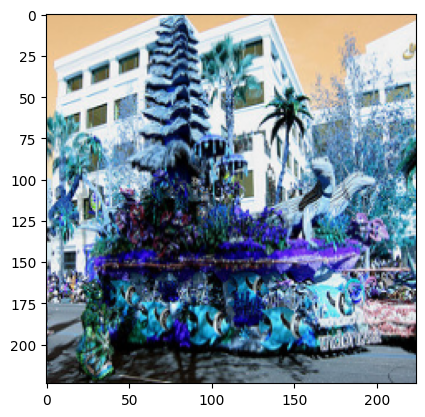

In [47]:
plt.imshow(X[7])

In [58]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector"
import tf_keras


IMAGE_SHAPE = (224, 224)

pre_trainded_model_without_top_layer = tf_keras.Sequential([
    hub.KerasLayer(feature_extractor_model, input_shape=(224,224,3), trainable=False)
])
#pre_trainded_model_without_top_layer.summary()
#pre trained model explanation 
#https://www.tensorflow.org/hub/tutorials/tf2_image_retraining\
#it is used to extract features from the images
#and how to use it to train a model is that we can use the features extracted from the images and use them to train a model
#this is called transfer learning


In [54]:
from tensorflow.keras import layers, models
import tensorflow as tf

model = tf.keras.Sequential([
    pre_trainded_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers, activation='softmax')  # Softmax for multi-class classification
])

# Display model summary
model.summary()

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tf_keras.src.engine.sequential.Sequential object at 0x000001FE30591210> (of type <class 'tf_keras.src.engine.sequential.Sequential'>)